# Covid19-analysis

Steps

    1-Import all the required  modules
    2-we need to understand about the dataset by performing EDA 
    3-

# 1.Importing modules

In [103]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium

In [2]:
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
os.chdir('D:\BE\prjectfiles\covid19')

In [4]:
dataset1=pd.read_csv('covid_19_india.csv',index_col=0)

In [5]:
dataset1.head(10)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
6,04/02/20,6:00 PM,Kerala,3,0,0,0,3
7,05/02/20,6:00 PM,Kerala,3,0,0,0,3
8,06/02/20,6:00 PM,Kerala,3,0,0,0,3
9,07/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
dataset1.tail(10)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
2441,29/05/20,8:00 AM,Punjab,-,-,1918,40,2139
2442,29/05/20,8:00 AM,Rajasthan,-,-,4457,173,7703
2443,29/05/20,8:00 AM,Sikkim,-,-,0,0,1
2444,29/05/20,8:00 AM,Tamil Nadu,-,-,9909,133,18545
2445,29/05/20,8:00 AM,Telengana,-,-,1284,63,2098
2446,29/05/20,8:00 AM,Tripura,-,-,165,0,230
2447,29/05/20,8:00 AM,Uttarakhand,-,-,79,4,469
2448,29/05/20,8:00 AM,Uttar Pradesh,-,-,3991,182,6991
2449,29/05/20,8:00 AM,West Bengal,-,-,1578,289,4192


In [7]:
dataset1.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450],
           dtype='int64', name='Sno', length=2450)

In [8]:
dataset1.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [9]:
dataset1.shape

(2450, 8)

In [10]:
dataset1.ndim

2

In [11]:
dataset1.size

19600

In [12]:
dataset1.loc[:,'Date']

Sno
1       30/01/20
2       31/01/20
3       01/02/20
4       02/02/20
5       03/02/20
          ...   
2446    29/05/20
2447    29/05/20
2448    29/05/20
2449    29/05/20
2450    29/05/20
Name: Date, Length: 2450, dtype: object

In [13]:
dataset1.at[4,'ConfirmedIndianNational']

'3'

In [14]:
dataset1.describe()

,Cured,Deaths,Confirmed
count,2450.000000,2450.000000,2450.000000
mean,423.193469,37.957551,1227.379184
std,1381.069153,149.523847,4187.451290
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.000000
50%,14.000000,1.000000,53.500000
75%,152.750000,11.000000,647.000000
max,17918.000000,1897.000000,56948.000000


       ---> To know datatypes of columns/variables we use dtypes()

In [15]:
dataset1.dtypes

Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [16]:
dataset1.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [17]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2450 entries, 1 to 2450
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      2450 non-null   object
 1   Time                      2450 non-null   object
 2   State/UnionTerritory      2450 non-null   object
 3   ConfirmedIndianNational   2450 non-null   object
 4   ConfirmedForeignNational  2450 non-null   object
 5   Cured                     2450 non-null   int64 
 6   Deaths                    2450 non-null   int64 
 7   Confirmed                 2450 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 252.3+ KB


In [18]:
dataset1.count()

Date                        2450
Time                        2450
State/UnionTerritory        2450
ConfirmedIndianNational     2450
ConfirmedForeignNational    2450
Cured                       2450
Deaths                      2450
Confirmed                   2450
dtype: int64

In [19]:
dataset1.isna()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2446,False,False,False,False,False,False,False,False
2447,False,False,False,False,False,False,False,False
2448,False,False,False,False,False,False,False,False


In [20]:
dataset1.isna().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [21]:
dataset1=dataset1.replace('-',0)

In [22]:
dataset1

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
2446,29/05/20,8:00 AM,Tripura,0,0,165,0,230
2447,29/05/20,8:00 AM,Uttarakhand,0,0,79,4,469
2448,29/05/20,8:00 AM,Uttar Pradesh,0,0,3991,182,6991


In [23]:
dataset1['Date'] = pd.to_datetime(dataset1['Date'], format = "%d/%m/%y")

In [24]:
dataset1['Date']

Sno
1      2020-01-30
2      2020-01-31
3      2020-02-01
4      2020-02-02
5      2020-02-03
          ...    
2446   2020-05-29
2447   2020-05-29
2448   2020-05-29
2449   2020-05-29
2450   2020-05-29
Name: Date, Length: 2450, dtype: datetime64[ns]

    first covid19 case in india 

In [25]:
dataset1.loc[1,['Date','State/UnionTerritory','ConfirmedIndianNational']]

Date                       2020-01-30 00:00:00
State/UnionTerritory                    Kerala
ConfirmedIndianNational                      1
Name: 1, dtype: object

In [26]:
dataset1['Date'].min()

Timestamp('2020-01-30 00:00:00')

In [27]:
dataset1['Date'].max()

Timestamp('2020-05-29 00:00:00')

In [28]:
dataset1['Date'].max() - dataset1['Date'].min()

Timedelta('120 days 00:00:00')

Groupby

In [29]:
dataset1.groupby(['State/UnionTerritory','Date']).sum()

Cured  Deaths  Confirmed
State/UnionTerritory        Date                                
Andaman and Nicobar Islands 2020-03-26      0       0          1
                            2020-03-27      0       0          1
                            2020-03-28      0       0          6
                            2020-03-29      0       0          9
                            2020-03-30      0       0          9
...                                       ...     ...        ...
West Bengal                 2020-05-25   1339     272       3667
                            2020-05-26   1414     278       3816
                            2020-05-27   1486     283       4009
                            2020-05-28   1578     289       4192
                            2020-05-29   1578     289       4192

[2450 rows x 3 columns]

In [30]:
dataset1.groupby(['Confirmed','State/UnionTerritory']).sum()

Cured  Deaths
Confirmed State/UnionTerritory                      
0         Nagaland                         0       0
1         Andaman and Nicobar Islands      0       0
          Andhra Pradesh                   0       0
          Arunachal Pradesh               35       0
          Assam                            0       0
...                                      ...     ...
47190     Maharashtra                  13404    1577
50231     Maharashtra                  14600    1635
52667     Maharashtra                  15786    1695
54758     Maharashtra                  16954    1792
56948     Maharashtra                  35836    3794

[1493 rows x 2 columns]

In [31]:
pd.set_option('display.max_rows',100)

In [32]:
dataset1

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
2446,2020-05-29,8:00 AM,Tripura,0,0,165,0,230
2447,2020-05-29,8:00 AM,Uttarakhand,0,0,79,4,469
2448,2020-05-29,8:00 AM,Uttar Pradesh,0,0,3991,182,6991


In [33]:
dataset1['State/UnionTerritory'].value_counts()

Kerala                              121
Delhi                                89
Telengana                            89
Rajasthan                            88
Haryana                              87
Uttar Pradesh                        87
Tamil Nadu                           84
Ladakh                               84
Maharashtra                          82
Punjab                               82
Karnataka                            82
Jammu and Kashmir                    82
Andhra Pradesh                       79
Uttarakhand                          76
Odisha                               75
West Bengal                          73
Puducherry                           73
Chandigarh                           72
Chhattisgarh                         72
Gujarat                              71
Madhya Pradesh                       70
Himachal Pradesh                     70
Bihar                                69
Manipur                              67
Mizoram                              66


In [34]:
filt=dataset1['State/UnionTerritory'] == 'Maharashtra'  
dataset1.loc[filt]

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2
92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5
98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2
121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11
134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14
147,2020-03-14,6:00 PM,Maharashtra,14,0,0,0,14
154,2020-03-15,6:00 PM,Maharashtra,32,0,0,0,32
168,2020-03-16,6:00 PM,Maharashtra,32,0,0,0,32
183,2020-03-17,6:00 PM,Maharashtra,36,3,0,1,39


In [35]:
dataset1.groupby(['State/UnionTerritory']).sum()

,Cured,Deaths,Confirmed
State/UnionTerritory,,,
Andaman and Nicobar Islands,1114,0,1478
Andhra Pradesh,37886,1775,83976
Arunachal Pradesh,39,0,61
Assam,1549,89,6314
Bihar,13824,277,42016
Cases being reassigned to states,0,0,26645
Chandigarh,2344,65,5972
Chhattisgarh,2080,0,4340
Dadar Nagar Haveli,0,0,30


In [36]:
dataset1['Deaths'].median()

1.0

In [37]:
dataset1['Confirmed'].median()

53.5

In [38]:
dataset1['Confirmed'].agg(['mean','median'])

mean      1227.379184
median      53.500000
Name: Confirmed, dtype: float64

In [39]:
States = dataset1['State/UnionTerritory'].unique().tolist()
States

['Kerala',
 'Telengana',
 'Delhi',
 'Rajasthan',
 'Uttar Pradesh',
 'Haryana',
 'Ladakh',
 'Tamil Nadu',
 'Karnataka',
 'Maharashtra',
 'Punjab',
 'Jammu and Kashmir',
 'Andhra Pradesh',
 'Uttarakhand',
 'Odisha',
 'Puducherry',
 'West Bengal',
 'Chhattisgarh',
 'Chandigarh',
 'Gujarat',
 'Himachal Pradesh',
 'Madhya Pradesh',
 'Bihar',
 'Manipur',
 'Mizoram',
 'Andaman and Nicobar Islands',
 'Goa',
 'Unassigned',
 'Assam',
 'Jharkhand',
 'Arunachal Pradesh',
 'Tripura',
 'Nagaland',
 'Meghalaya',
 'Dadar Nagar Haveli',
 'Cases being reassigned to states',
 'Sikkim']

In [40]:
States.remove('Cases being reassigned to states')
States.remove('Unassigned')

In [41]:
States

['Kerala',
 'Telengana',
 'Delhi',
 'Rajasthan',
 'Uttar Pradesh',
 'Haryana',
 'Ladakh',
 'Tamil Nadu',
 'Karnataka',
 'Maharashtra',
 'Punjab',
 'Jammu and Kashmir',
 'Andhra Pradesh',
 'Uttarakhand',
 'Odisha',
 'Puducherry',
 'West Bengal',
 'Chhattisgarh',
 'Chandigarh',
 'Gujarat',
 'Himachal Pradesh',
 'Madhya Pradesh',
 'Bihar',
 'Manipur',
 'Mizoram',
 'Andaman and Nicobar Islands',
 'Goa',
 'Assam',
 'Jharkhand',
 'Arunachal Pradesh',
 'Tripura',
 'Nagaland',
 'Meghalaya',
 'Dadar Nagar Haveli',
 'Sikkim']

In [42]:
len(States)

35

In [43]:
india_loc=pd.read_csv("Indian Coordinates.csv")

In [44]:
india_loc.head()

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [45]:
len(india_loc)

35

In [46]:
india_loc.dtypes

Name of State / UT     object
Latitude              float64
Longitude             float64
Unnamed: 3            float64
dtype: object

In [47]:
india_loc.size

140

In [48]:
india_loc.ndim

2

In [49]:
india_loc.info

<bound method DataFrame.info of                       Name of State / UT   Latitude  Longitude  Unnamed: 3
0                   Andaman And Nicobar   11.667026  92.735983         NaN
1                         Andhra Pradesh  14.750429  78.570026         NaN
2                     Arunachal Pradesh   27.100399  93.616601         NaN
3                                 Assam   26.749981  94.216667         NaN
4                                 Bihar   25.785414  87.479973         NaN
5                            Chandigarh   30.719997  76.780006         NaN
6                          Chhattisgarh   22.090420  82.159987         NaN
7                Dadra And Nagar Haveli   20.266578  73.016618         NaN
8                                  Delhi  28.669993  77.230004         NaN
9                                   Goa   15.491997  73.818001         NaN
10                               Haryana  28.450006  77.019991         NaN
11                     Himachal Pradesh   31.100025  77.166597      

In [50]:
india_loc.describe()

,Latitude,Longitude,Unnamed: 3
count,35.000000,35.000000,0.0
mean,22.827205,82.021144,NaN
std,6.971512,7.371870,NaN
min,8.900373,72.636867,NaN
25%,18.681316,76.674999,NaN
50%,23.835404,78.570026,NaN
75%,27.466655,88.473297,NaN
max,34.100000,94.216667,NaN


In [51]:
list(zip(dataset1.columns,dataset1.dtypes,dataset1.isna().sum()))

[('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('O'), 0),
 ('ConfirmedForeignNational', dtype('O'), 0),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

# Merging dataframes

In [88]:
dataset= pd.DataFrame()

dates = pd.DataFrame( { "Date": pd.date_range( dataset1.Date.min(),dataset1.Date.max() ) } )

for state in States:
    
    all_dates_df = pd.merge(dates, dataset1.loc[dataset1['State/UnionTerritory'] == state,:], on = "Date",how = "left")
    
    all_dates_df['State/UnionTerritory'] = state
    
    all_dates_df = all_dates_df.fillna(0)
    
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
    
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])

    dataset = pd.concat([dataset, all_dates_df],axis = 0)
    
print("Finally we have a data of Size: ",dataset.shape)
dataset.head()

Finally we have a data of Size:  (4235, 9)


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,New Cases
0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
1,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0,0.0
2,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0,1.0
3,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0,1.0
4,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0,0.0


In [53]:
dataset.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed',
       'New Cases'],
      dtype='object')

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4235 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4235 non-null   datetime64[ns]
 1   Time                      4235 non-null   object        
 2   State/UnionTerritory      4235 non-null   object        
 3   ConfirmedIndianNational   4235 non-null   object        
 4   ConfirmedForeignNational  4235 non-null   object        
 5   Cured                     4235 non-null   float64       
 6   Deaths                    4235 non-null   float64       
 7   Confirmed                 4235 non-null   float64       
 8   New Cases                 4200 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 330.9+ KB


In [77]:
confirmed=dataset.groupby('Date').sum()
confirmed

,Cured,Deaths,Confirmed,New Cases
Date,,,,
2020-01-30,0.0,0.0,1.0,0.0
2020-01-31,0.0,0.0,1.0,0.0
2020-02-01,0.0,0.0,2.0,1.0
2020-02-02,0.0,0.0,3.0,1.0
2020-02-03,0.0,0.0,3.0,0.0
...,...,...,...,...
2020-05-25,57721.0,4021.0,136203.0,6673.0
2020-05-26,60491.0,4167.0,142410.0,6207.0
2020-05-27,64426.0,4337.0,147754.0,5344.0


01-january-2020 to 31-may-2020 cases

In [57]:
death=dataset.groupby('State/UnionTerritory').sum()
death

,Cured,Deaths,Confirmed,New Cases
State/UnionTerritory,,,,
Andaman and Nicobar Islands,1114.0,0.0,1478.0,33.0
Andhra Pradesh,37886.0,1775.0,83976.0,3171.0
Arunachal Pradesh,39.0,0.0,61.0,2.0
Assam,1549.0,89.0,6314.0,781.0
Bihar,13824.0,277.0,42016.0,3061.0
Chandigarh,2344.0,65.0,5972.0,279.0
Chhattisgarh,2080.0,0.0,4340.0,369.0
Dadar Nagar Haveli,0.0,0.0,30.0,2.0
Delhi,116183.0,5010.0,305050.0,15257.0


In [58]:
dataset['State/UnionTerritory'].value_counts()

Delhi                          121
Kerala                         121
Sikkim                         121
Haryana                        121
Himachal Pradesh               121
Andhra Pradesh                 121
Andaman and Nicobar Islands    121
Telengana                      121
Tripura                        121
Maharashtra                    121
Madhya Pradesh                 121
Assam                          121
Tamil Nadu                     121
Goa                            121
Chhattisgarh                   121
Arunachal Pradesh              121
Punjab                         121
Karnataka                      121
Rajasthan                      121
Ladakh                         121
Nagaland                       121
Gujarat                        121
Mizoram                        121
Jharkhand                      121
Dadar Nagar Haveli             121
Uttarakhand                    121
Chandigarh                     121
Jammu and Kashmir              121
Meghalaya           

In [60]:
confirmed.head()

,Cured,Deaths,Confirmed,New Cases
Date,,,,
2020-01-30,0.0,0.0,1.0,0.0
2020-01-31,0.0,0.0,1.0,0.0
2020-02-01,0.0,0.0,2.0,1.0
2020-02-02,0.0,0.0,3.0,1.0
2020-02-03,0.0,0.0,3.0,0.0


In [61]:
death.tail()

,Cured,Deaths,Confirmed,New Cases
State/UnionTerritory,,,,
Telengana,29397.0,1569.0,62126.0,2098.0
Tripura,1894.0,0.0,3859.0,230.0
Uttar Pradesh,67600.0,3335.0,153258.0,6991.0
Uttarakhand,1836.0,40.0,5252.0,469.0
West Bengal,24092.0,5978.0,78816.0,4192.0


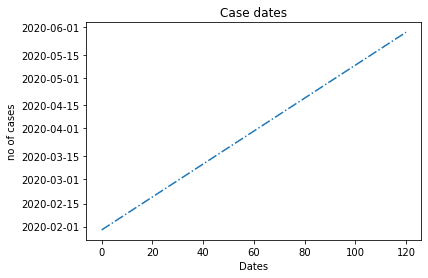

In [62]:
plt.plot(dataset.Date,linestyle="-.")
plt.title('Case dates')
plt.xlabel('Dates')
plt.ylabel('no of cases')
plt.show()

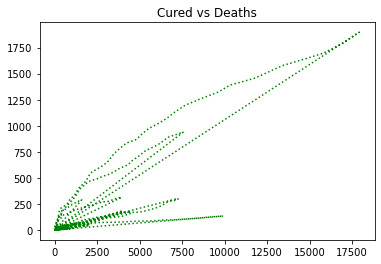

In [63]:
plt.plot(dataset.Cured,dataset.Deaths,color='g',linestyle=':')
plt.title("Cured vs Deaths")
plt.show()

In [64]:
pyo.plot([{
    'x': dataset.Cured,
    'y': dataset.Deaths
}])
pyo.download_plotlyjs('file:///D:/BE/prjectfiles/covid19/temp-plot.html')

In [81]:
fig=go.Figure()
fig.update_layout(title="india covid 19",yaxis=dict(title="number of cases"))
fig.add_trace(go.Scatter(x = dataset['Date'], y = dataset['Cured'], mode='lines+markers',line=dict(color="Green")))
fig.add_trace(go.Scatter(x =  dataset['Date'], y=dataset['Deaths'], mode ='lines+markers',line=dict(color="Red")))
fig.show()

In [85]:
dataset['Date']=dataset['Date'].astype(str)

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4235 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      4235 non-null   object 
 1   Time                      4235 non-null   object 
 2   State/UnionTerritory      4235 non-null   object 
 3   ConfirmedIndianNational   4235 non-null   object 
 4   ConfirmedForeignNational  4235 non-null   object 
 5   Cured                     4235 non-null   float64
 6   Deaths                    4235 non-null   float64
 7   Confirmed                 4235 non-null   float64
 8   New Cases                 4200 non-null   float64
dtypes: float64(4), object(5)
memory usage: 330.9+ KB


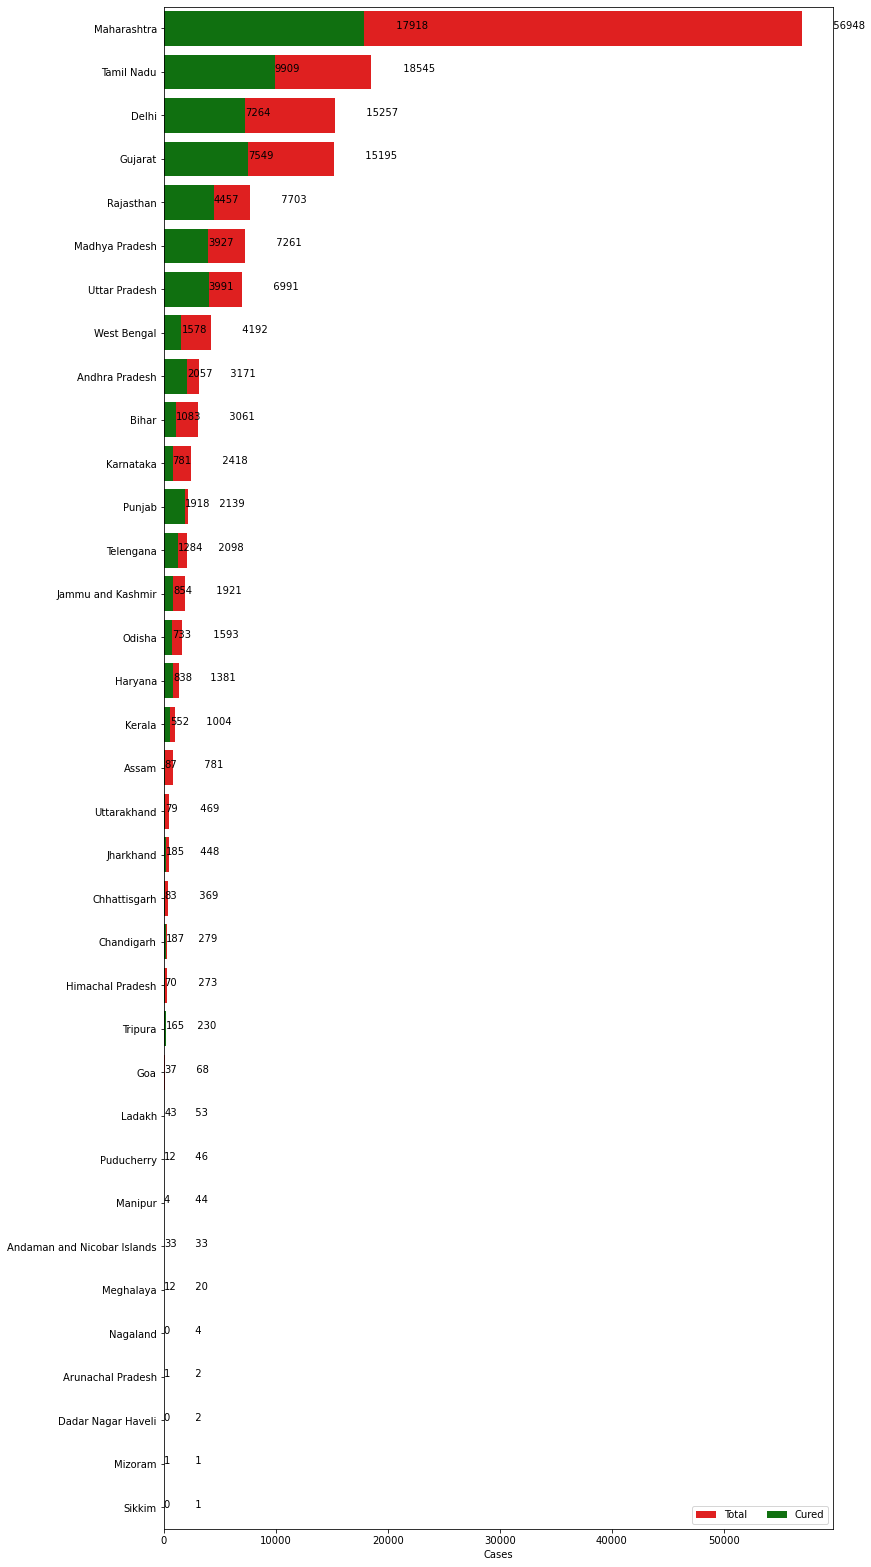

In [100]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
i = 0
for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))
        
    i += 1


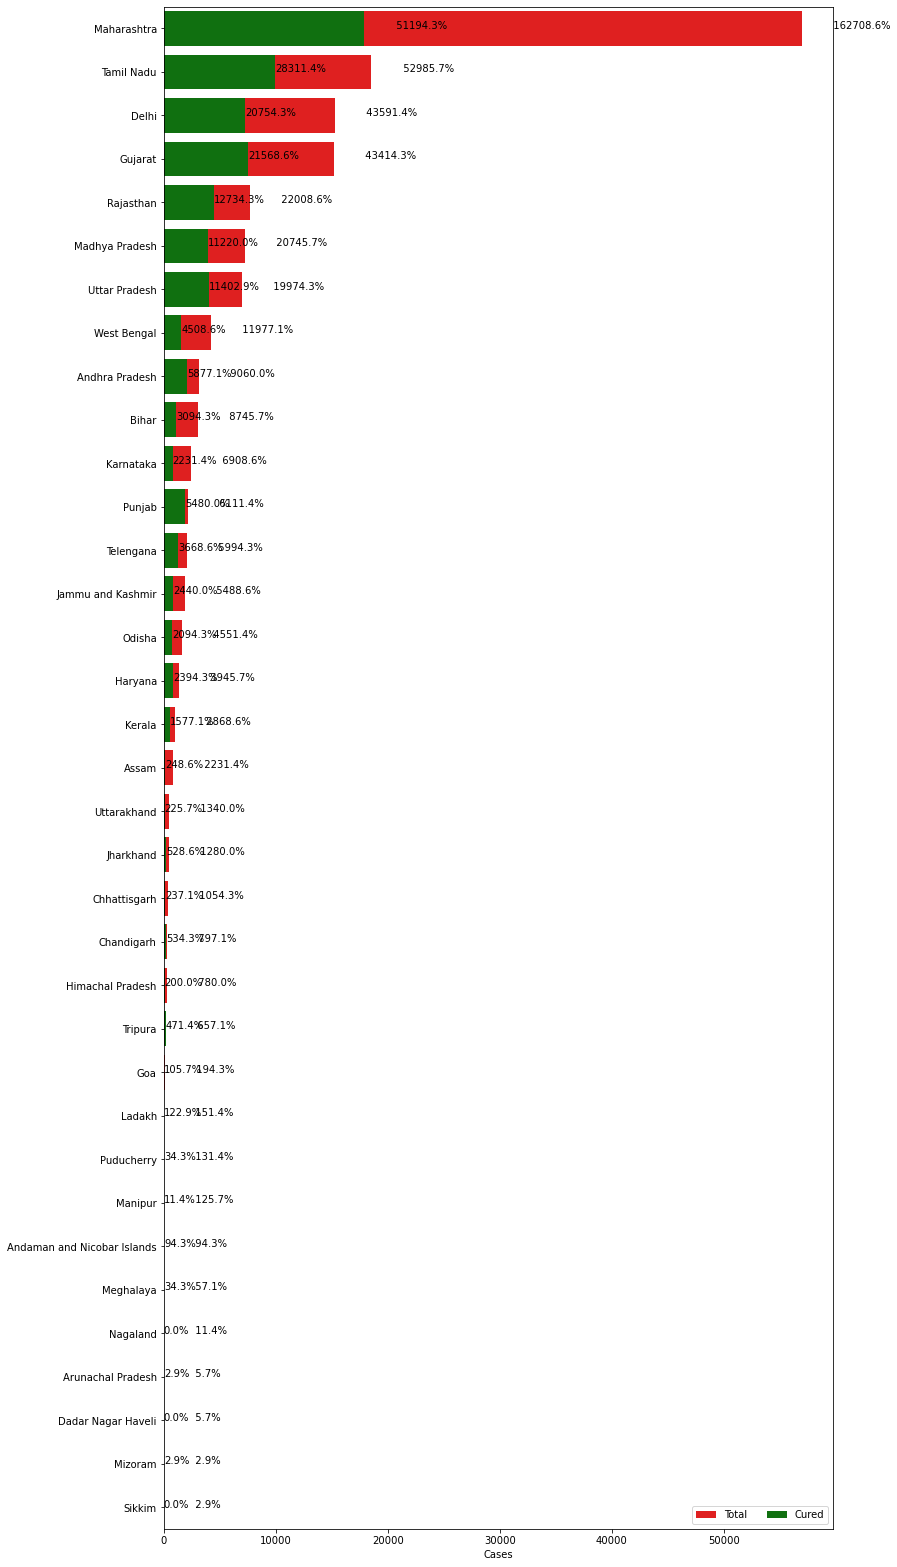

In [101]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1

In [113]:
india_loc.rename(columns = {"Name of State / UT" : "State/UnionTerritory"},inplace = True)

In [114]:
set(india_loc['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar ',
 'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli ',
 'Goa',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Ladakh',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Manipur',
 'Manipur ',
 'Meghalaya',
 'Meghalaya ',
 'Mizoram',
 'Mizoram ',
 'Nagaland',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry',
 'Puducherry ',
 'Sikkim',
 'Sikkim ',
 'Tripura',
 'Tripura ',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [115]:
india_loc['State/UnionTerritory'] = india_loc['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()


In [116]:
set(india_loc['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Gujarat',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [119]:
india_loc['State/UnionTerritory'] = np.where(india_loc['State/UnionTerritory'] == "Andaman And Nicobar", "Andaman and Nicobar Islands",india_loc['State/UnionTerritory'])
                        
india_loc['State/UnionTerritory'] = np.where(india_loc['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",india_loc['State/UnionTerritory'])
india_loc['State/UnionTerritory'] = np.where(india_loc['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",india_loc['State/UnionTerritory'])
india_loc['State/UnionTerritory'] = np.where(india_loc['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",india_loc['State/UnionTerritory'])
india_loc['State/UnionTerritory'] = np.where(india_loc['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",india_loc['State/UnionTerritory'])

In [121]:
set(india_loc['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Gujarat', 'Lakshadweep'}